# Final Analysis

### Research Questions:
1) Chinmay Jain: What type of playstyle (offensive/defensive) leads to most success in each league (Top 5 European Leagues)?
2) Lakshay Karnwal: Why do teams with the highest xG(expected goals) still end up not winning the league and which factors cause the upset?

### Desciption of Variables:

- **xG** - expected goals metric, it is a statistical measure of the quality of chances created and conceded.
- **xG_diff** - difference between actual goals scored and expected goals.
- **npxG** - expected goals without penalties and own goals.
- **xGA** - expected goals against.
- **xGA_diff** - difference between actual goals missed and expected goals against.
- **npxGA** - expected goals against without penalties and own goals.
- **npxGD** - difference between "for" and "against" expected goals without penalties and own goals.
- **ppda_coef** - passes allowed per defensive action in the opposition half (power of pressure)
- **oppda_coef** - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)
- **deep** - passes completed within an estimated 20 yards of goal (crosses excluded)
- **deep_allowed** - opponent passes completed within an estimated 20 yards of goal (crosses excluded)
- **xpts** - expected points
- **xpts_diff** - difference between actual and expected points

# Research Question #1

In [ ]:
from ChinmayJain.Scripts import project_functions as pf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
from importlib import reload

### Filtering and Processing the raw dataset: 

In [28]:
reload(pf)
df_av = pf.weighted_av("../data/raw/understat.com.csv")
display(df_av)

,League,Offensive W_Average,Defensive W_Average
0,Bundesliga,77.876214,66.411573
1,Bundesliga_topTeam,141.357324,42.132653
2,EPL,90.734783,76.903034
3,EPL_topTeam,149.419166,53.906898
4,La_liga,81.208791,68.944727
5,La_liga_topTeam,159.440089,52.857754
6,Ligue_1,68.325874,58.573423
7,Ligue_1_topTeam,133.357504,43.853299
8,Serie_A,85.139277,72.319601
9,Serie_A_topTeam,106.688946,46.248320


### Graphing the Offensive and Defensive Weighted Average:

Text(0.5, 1.0, 'Serie A Winners')

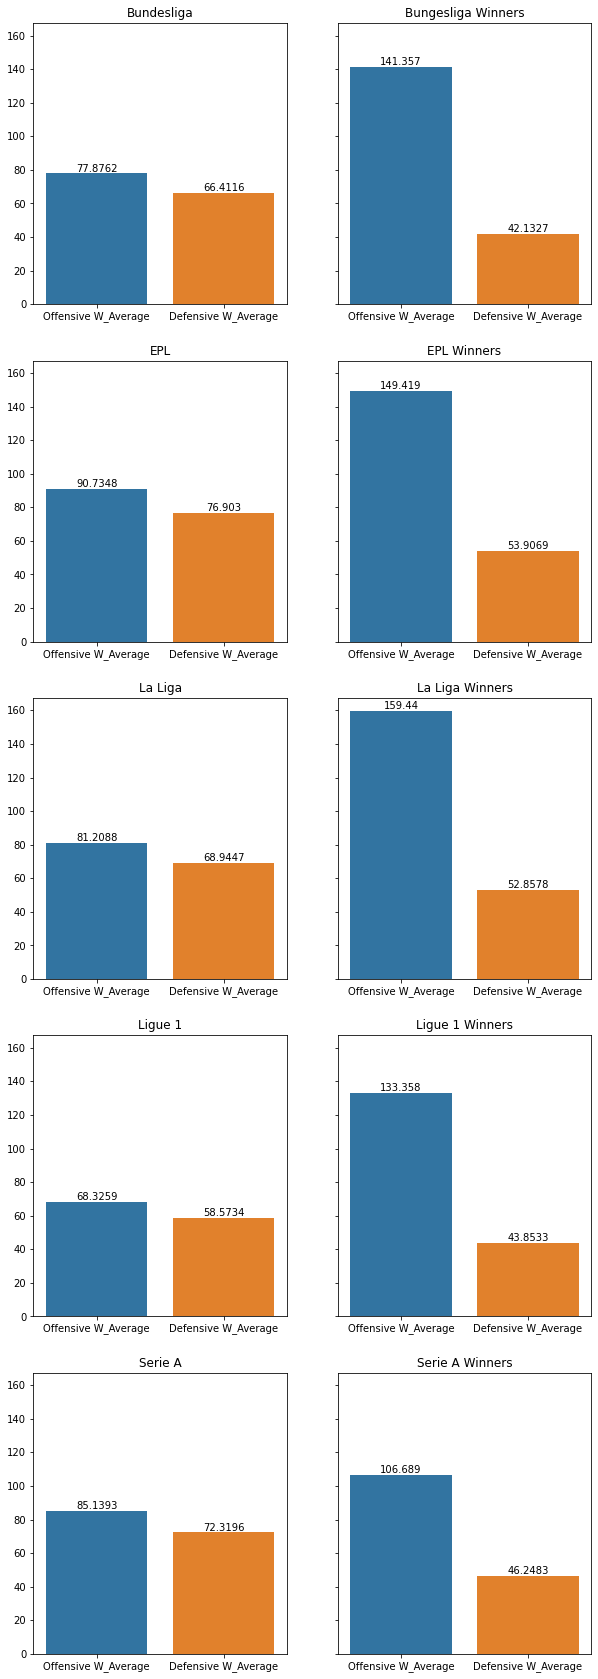

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(10,30),sharey=True)
#fig.suptitle('Comparing the Top Teams and their League in Regards to their Offensive and Defensive Weighted Average ')
ax = sns.barplot(ax = axes[0,0], data = df_av.iloc[0:1])
ax.bar_label(ax.containers[0])
ax2 = sns.barplot(ax = axes[0,1], data = df_av.iloc[1:2])
ax2.bar_label(ax2.containers[0])
ax3 = sns.barplot(ax = axes[1,0], data = df_av.iloc[2:3])
ax3.bar_label(ax3.containers[0])
ax4 = sns.barplot(ax = axes[1,1], data = df_av.iloc[3:4])
ax4.bar_label(ax4.containers[0])
ax5 = sns.barplot(ax = axes[2,0], data = df_av.iloc[4:5])
ax5.bar_label(ax5.containers[0])
ax6 = sns.barplot(ax = axes[2,1], data = df_av.iloc[5:6])
ax6.bar_label(ax6.containers[0])
ax7 = sns.barplot(ax = axes[3,0], data = df_av.iloc[6:7])
ax7.bar_label(ax7.containers[0])
ax8 = sns.barplot(ax = axes[3,1], data = df_av.iloc[7:8])
ax8.bar_label(ax8.containers[0])
ax9 = sns.barplot(ax = axes[4,0], data = df_av.iloc[8:9])
ax9.bar_label(ax9.containers[0])
ax10 = sns.barplot(ax = axes[4,1], data = df_av.iloc[9:10])
ax10.bar_label(ax10.containers[0])

axes[0,0].set_title('Bundesliga')
axes[0,1].set_title('Bungesliga Winners')
axes[1,0].set_title('EPL')
axes[1,1].set_title('EPL Winners')
axes[2,0].set_title('La Liga')
axes[2,1].set_title('La Liga Winners')
axes[3,0].set_title('Ligue 1')
axes[3,1].set_title('Ligue 1 Winners')
axes[4,0].set_title('Serie A')
axes[4,1].set_title('Serie A Winners')

#### Observations/Analysis

- **Bundesliga**
    - The league as whole plays slightly more offensively but it is still quite balanced.
    - The league winners play very offensively so in the Bundesliga offensive teams have more success.
- **EPL**
    - The EPL has the heighest offensive and defensive averages compared to the other leagues and it also plays slightly more offensively. 
    - The league winners play very offensively but EPL winners have the highest defensive average compared to other league winners. So in the EPL offensive teams have more success but they still need to have a reliable defensive backline.
- **La Liga**
    - The La Liga is a slightly more offense based league.
    - The La Liga winners have the highest offensive average compared to the other winners so in the La Liga the teams need to have a strong group of forwards in order to be successful
- **Ligue 1**
    - The Ligue 1 has the lowest offensive and defensive averages which indicates that they have the weakest teams.
    - The Ligue 1 winners are more offensive so in the Ligue 1 teams have to be very offensive in order to be successful.
- **Serie A**
    - The Serie A is 2nd in both offensive and defensive averages and the averages are close so teams have to be offensive and defensively strong.
    - The Serie A winners have the lowest offensive score compared to the other winners but they are still very offensive heavy

**Conclusion:** Our results are interesting as it shows that in every league the winners are quite offensive heavy, but each league is slightly different in how offensively and defensively they play.

# Research Question #2

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from importlib import reload
from LakshayKarnwal.Scripts import project_functions as pf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Filtering and Processing the raw dataset: 

In [8]:
path = "../data/raw/understat.com.csv"
df = pf.load_and_process(path)
display(df)

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
0,La_liga,2014,1,Barcelona,38,110,21,94,102.980152,28.444293,5.683535,16.367593,94.0813,2.473684
1,La_liga,2014,2,Real Madrid,38,118,38,92,95.766243,42.607198,10.209085,12.929510,81.7489,2.421053
2,La_liga,2014,3,Atletico Madrid,38,67,29,78,57.047670,29.069107,8.982028,9.237091,73.1353,2.052632
3,La_liga,2014,4,Valencia,38,70,32,77,55.062500,39.392572,8.709827,7.870225,63.7068,2.026316
4,La_liga,2014,5,Sevilla,38,71,45,76,69.526624,47.862742,8.276148,9.477805,67.3867,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,Ligue_1,2019,16,Dijon,28,27,37,30,27.378050,39.300382,14.308293,9.703021,31.1870,1.071429
584,Ligue_1,2019,17,Saint-Etienne,28,29,45,30,29.651493,37.725643,10.718417,10.496213,32.6755,1.071429
585,Ligue_1,2019,18,Nimes,28,29,44,27,30.193755,40.473400,12.457197,9.054791,32.6876,0.964286
586,Ligue_1,2019,19,Amiens,28,31,50,23,25.619869,38.426209,12.449507,9.917285,32.8361,0.821429


### Finding out the required dataset from specific league and year:

In [9]:
required_dataset= pf.filter_data_set('EPL',2014, path)

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
120,EPL,2014,1,Chelsea,38,73,32,87,68.643320,31.524344,10.942027,13.419520,75.3172,2.289474
121,EPL,2014,2,Manchester City,38,83,38,79,75.815441,40.499403,7.982490,15.076979,73.0982,2.078947
122,EPL,2014,3,Arsenal,38,71,36,75,69.802591,35.718825,8.660596,13.254169,75.1740,1.973684


### Graphing Team's effect on opponent:

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
120,EPL,2014,1,Chelsea,38,73,32,87,68.643320,31.524344,10.942027,13.419520,75.3172,2.289474
121,EPL,2014,2,Manchester City,38,83,38,79,75.815441,40.499403,7.982490,15.076979,73.0982,2.078947
122,EPL,2014,3,Arsenal,38,71,36,75,69.802591,35.718825,8.660596,13.254169,75.1740,1.973684


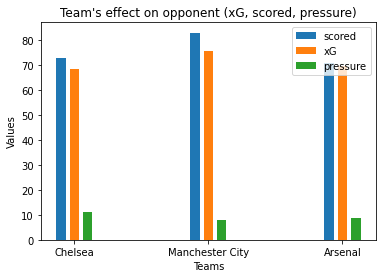

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
348,Serie_A,2014,1,Juventus,38,72,24,87,59.077044,29.129634,8.715008,13.017563,74.7890,2.289474
350,Serie_A,2014,3,Lazio,38,71,38,69,61.996225,35.871453,7.282635,11.223855,67.7905,1.815789
351,Serie_A,2014,4,Fiorentina,38,61,46,64,60.670595,48.502489,7.757888,12.457943,61.1128,1.684211
352,Serie_A,2014,5,Napoli,38,70,54,63,64.495380,34.373501,8.836460,13.312875,70.7221,1.657895


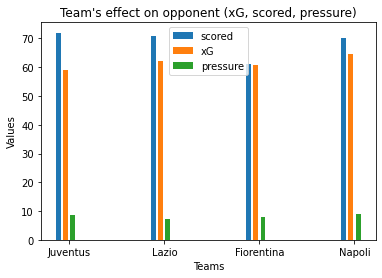

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
508,Ligue_1,2016,1,Monaco,38,107,31,95,76.036980,34.893628,9.587803,12.331291,78.0559,2.500000
509,Ligue_1,2016,2,Paris Saint Germain,38,83,27,87,82.162399,24.247968,8.026454,20.293991,87.2195,2.289474


,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
508,Ligue_1,2016,1,Monaco,38,107,31,95,76.036980,34.893628,9.587803,12.331291,78.0559,2.500000
509,Ligue_1,2016,2,Paris Saint Germain,38,83,27,87,82.162399,24.247968,8.026454,20.293991,87.2195,2.289474


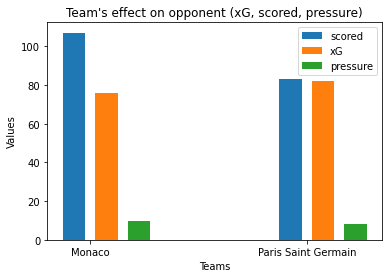

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
60,La_liga,2017,1,Barcelona,38,99,29,93,90.486752,41.620820,9.109883,13.939373,79.4375,2.447368
62,La_liga,2017,3,Real Madrid,38,94,44,76,91.287370,45.097868,9.303382,13.999744,79.9894,2.000000


,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
60,La_liga,2017,1,Barcelona,38,99,29,93,90.486752,41.620820,9.109883,13.939373,79.4375,2.447368
62,La_liga,2017,3,Real Madrid,38,94,44,76,91.287370,45.097868,9.303382,13.999744,79.9894,2.000000


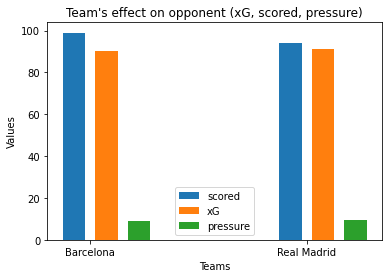

In [10]:
df1= pf.filter_data_set('EPL',2014,1,path)
display(df1)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=1)
plt.show()

df1= pf.filter_data_set('Serie_A',2014,1, path)
display(df1)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=1)
plt.show()

df1= pf.filter_data_set('Ligue_1',2016, path)
display(df1)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=1)
plt.show()

df1= pf.filter_data_set('La_liga',2017, path)
display(df1)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=1)
plt.show()

### Graphing opponent's effect on Team:

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
120,EPL,2014,1,Chelsea,38,73,32,87,68.643320,31.524344,10.942027,13.419520,75.3172,2.289474
121,EPL,2014,2,Manchester City,38,83,38,79,75.815441,40.499403,7.982490,15.076979,73.0982,2.078947
122,EPL,2014,3,Arsenal,38,71,36,75,69.802591,35.718825,8.660596,13.254169,75.1740,1.973684


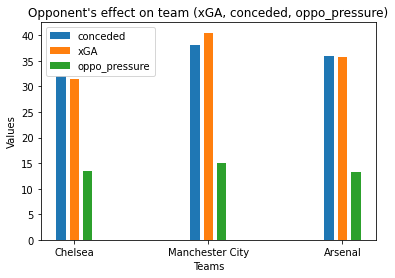

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
348,Serie_A,2014,1,Juventus,38,72,24,87,59.077044,29.129634,8.715008,13.017563,74.7890,2.289474
350,Serie_A,2014,3,Lazio,38,71,38,69,61.996225,35.871453,7.282635,11.223855,67.7905,1.815789
351,Serie_A,2014,4,Fiorentina,38,61,46,64,60.670595,48.502489,7.757888,12.457943,61.1128,1.684211
352,Serie_A,2014,5,Napoli,38,70,54,63,64.495380,34.373501,8.836460,13.312875,70.7221,1.657895


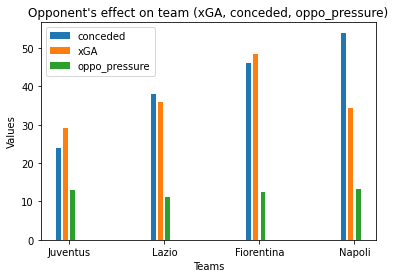

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
508,Ligue_1,2016,1,Monaco,38,107,31,95,76.036980,34.893628,9.587803,12.331291,78.0559,2.500000
509,Ligue_1,2016,2,Paris Saint Germain,38,83,27,87,82.162399,24.247968,8.026454,20.293991,87.2195,2.289474


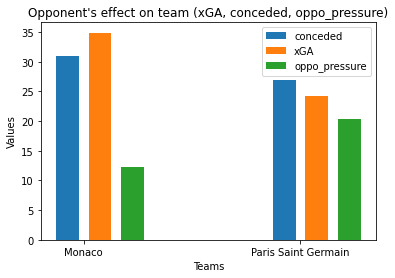

,league,year,position,team,matches,scored,conceded,pts,xG,xGA,pressure,oppo_pressure,xpts,pts_per_game
60,La_liga,2017,1,Barcelona,38,99,29,93,90.486752,41.620820,9.109883,13.939373,79.4375,2.447368
62,La_liga,2017,3,Real Madrid,38,94,44,76,91.287370,45.097868,9.303382,13.999744,79.9894,2.000000


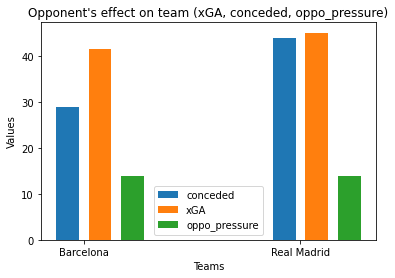

In [11]:
df1= pf.filter_data_set('EPL',2014, path)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2)
plt.show()

df1= pf.filter_data_set('Serie_A',2014, path)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2)
plt.show()

df1= pf.filter_data_set('Ligue_1',2016, path)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2)
plt.show()

df1= pf.filter_data_set('La_liga',2017, path)
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2)
plt.show()

### Graphing net effect of the team: